In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='paper', style='whitegrid', rc={'figure.figsize':(8, 5), 'figure.dpi': 120})
color_palette = sns.color_palette("Set2")
sns.set_palette(color_palette)

In [2]:
df = pd.read_csv("./data/sunspots.csv")

In [3]:
df.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


### drop first column and rename column

In [4]:
df.drop(columns=[df.columns[0]], axis=1, inplace=True)

In [5]:
df.rename(columns={df.columns[1]: 'monthly_sunspot'}, inplace=True)

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.head()

,Date,monthly_sunspot
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7


## EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252 entries, 0 to 3251
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             3252 non-null   datetime64[ns]
 1   monthly_sunspot  3252 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 50.9 KB


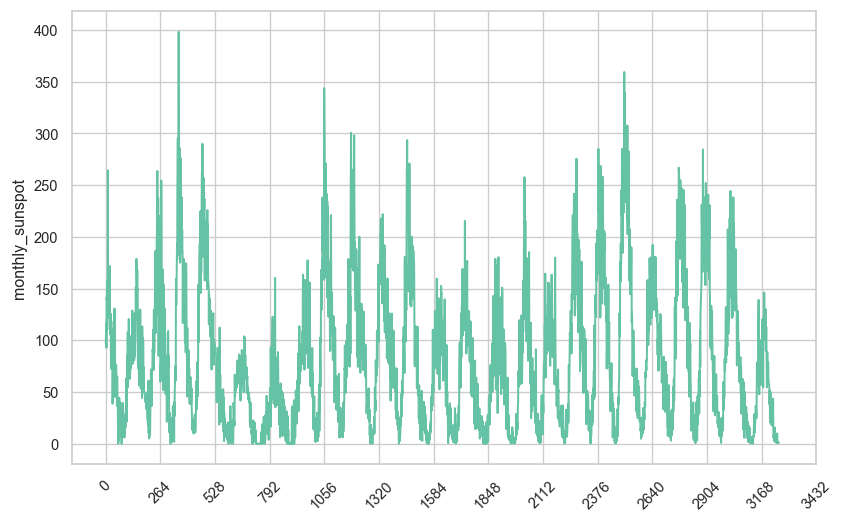

In [9]:
time = np.arange(len(df))
period = 22*12
xtick = np.arange(0, len(time)+period, period)

sns.lineplot(x=time, y='monthly_sunspot', data=df)
plt.xticks(xtick, rotation=45)
plt.show()

## period 11 year/22 year

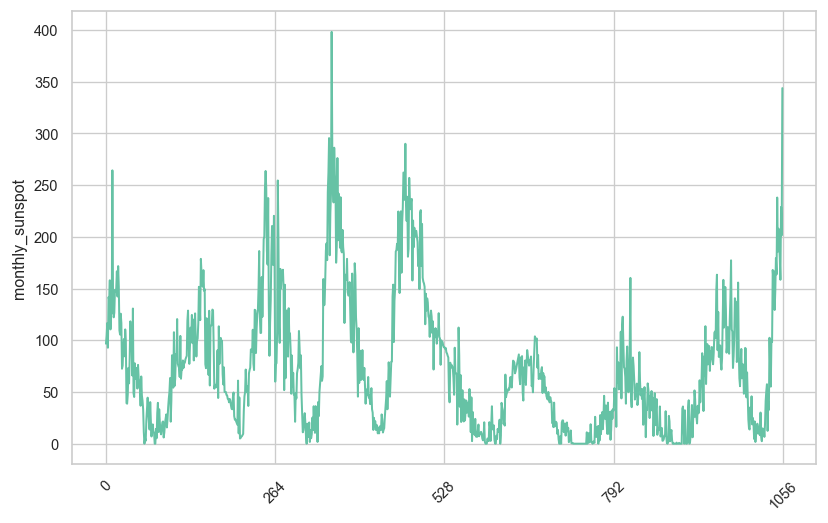

In [10]:
period = 22*12
df1 = df[:period*4]
time = np.arange(len(df1))
xtick = np.arange(0, len(time)+period, period)

sns.lineplot(x=time, y='monthly_sunspot', data=df1)
plt.xticks(xtick, rotation=45)
plt.show()

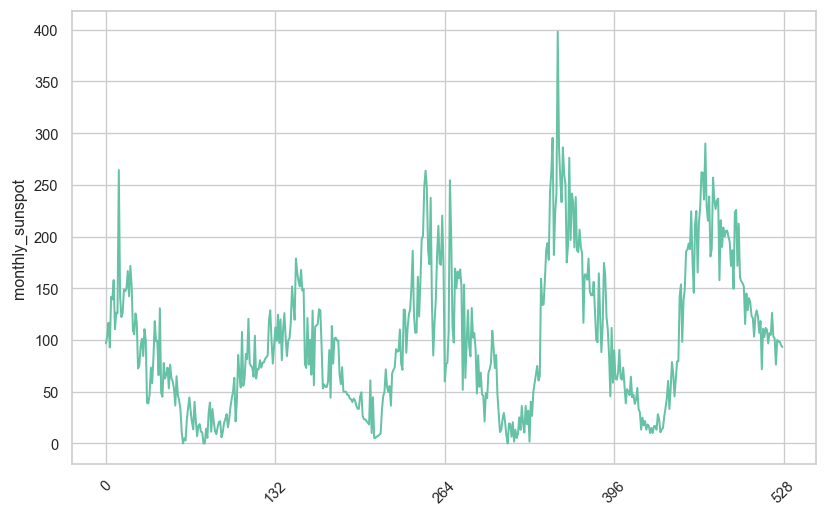

In [11]:
period = 11*12
df1 = df[:period*4]
time = np.arange(len(df1))
xtick = np.arange(0, len(time)+period, period)

sns.lineplot(x=time, y='monthly_sunspot', data=df1)
plt.xticks(xtick, rotation=45)
plt.show()

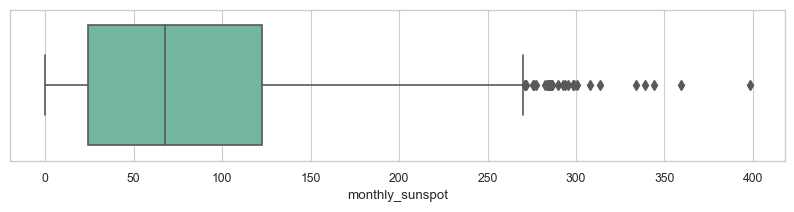

In [12]:
fig = plt.figure(figsize=(10, 2), dpi=100)
sns.boxplot(df['monthly_sunspot'])

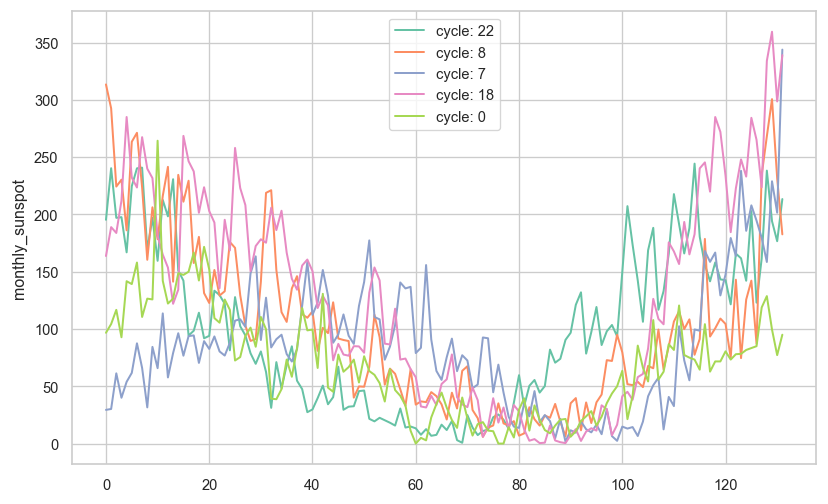

In [15]:
period = 11*12
num_cycle = len(df)//period
cycles = np.random.choice(np.arange(num_cycle), 5, replace=False)

for i in cycles:
    start = i*period
    end = (i+1)*period
    dfs = df[start:end]
    time = np.arange(len(dfs))
    sns.lineplot(time, dfs['monthly_sunspot'], label=f"cycle: {i}")